In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

num_students = len(df)

print(f"Kişi Sayısı: {num_students}\n")
display(df.head(5)) 


Kişi Sayısı: 1000



,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,grade
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,DC
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,AA
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,FF
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,FF
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,CC


| Sütun Adı                       | Açıklama                                                                       |
| ------------------------------- | ------------------------------------------------------------------------------ |
| `age`                           | Öğrencinin yaşı                                                                |
| `gender`                        | Öğrencinin cinsiyeti (`Male` / `Female`)                                       |
| `study_hours_per_day`           | Günlük ortalama ders çalışma süresi (saat)                                     |
| `social_media_hours`            | Günlük sosyal medya kullanımı süresi (saat)                                    |
| `netflix_hours`                 | Günlük Netflix vb. platformlarda dizi/film izleme süresi (saat)                |
| `part_time_job`                 | Öğrencinin yarı zamanlı bir işte çalışıp çalışmadığı (`Yes` / `No`)            |
| `attendance_percentage`         | Öğrencinin derslere devam oranı (%)                                            |
| `sleep_hours`                   | Günlük ortalama uyku süresi (saat)                                             |
| `diet_quality`                  | Öğrencinin beslenme kalitesi (`Poor`, `Fair`, `Good`)                          |
| `exercise_frequency`            | Haftalık egzersiz sıklığı (gün)                                                |
| `parental_education_level`      | Ebeveynlerin en yüksek eğitim düzeyi (`Primary School`, `High School`, `Bachelor`, `Master`) |
| `internet_quality`              | Öğrencinin internet bağlantı kalitesi (`Poor`, `Average`, `Good`)              |
| `mental_health_rating`          | Öğrencinin zihinsel sağlık düzeyi (1–10 arası değerlendirme)                   |
| `extracurricular_participation` | Öğrencinin ders dışı etkinliklere katılım durumu (`Yes` / `No`)                |
| `exam_score`                    | Öğrencinin sınavdan aldığı puan (0–100 arası)                                  |
|  `grade`                   | Öğrencinin harf notu aşağıdaki tabloda belirtilmiştir|


| Puan Aralığı | Not İsmi      | Anlamı                          |
| ------------ | ------------- | ------------------------------- |
| 90 – 100     | AA            | Mükemmel                        |
| 85 – 89      | BA            | Çok Başarılı                    |
| 80 – 84      | BB      | Başarılı                        |
| 70 – 79      | CB | Yeterli                         |
| 60 – 69      | CC     | Sınırda Geçer                   |
| 50 – 59      | DC  | Şartlı geçer  |
| 40 – 49      | DD  | Başarısız  |
| 0 – 39       | FF   | Başarısız                       |


In [168]:
import pandas as pd

df = pd.read_csv('data.csv')

missing_data = df.isnull().sum().reset_index()
missing_data.columns = ['Sütun Adı', 'Eksik Veri Sayısı']

missing_data = missing_data[missing_data['Eksik Veri Sayısı'] > 0]

if missing_data.empty:
    print("Veri setinde eksik veri bulunmamaktadır.")
else:
    from IPython.display import display
    display(missing_data)


Veri setinde eksik veri bulunmamaktadır.


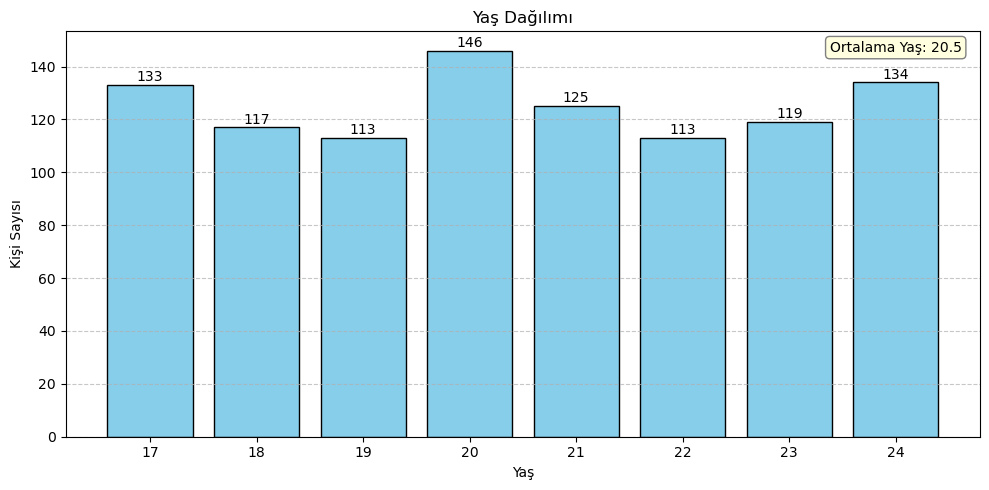

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

age_counts = df['age'].value_counts().sort_index()
mean_age = df['age'].mean()

plt.figure(figsize=(10, 5))
bars = plt.bar(age_counts.index, age_counts.values, color='skyblue', edgecolor='black')

plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Kişi Sayısı")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, int(yval), ha='center', va='bottom')

plt.text(
    0.98, 0.95,
    f"Ortalama Yaş: {mean_age:.1f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    ha='right',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='lightyellow')
)

plt.tight_layout()
plt.show()


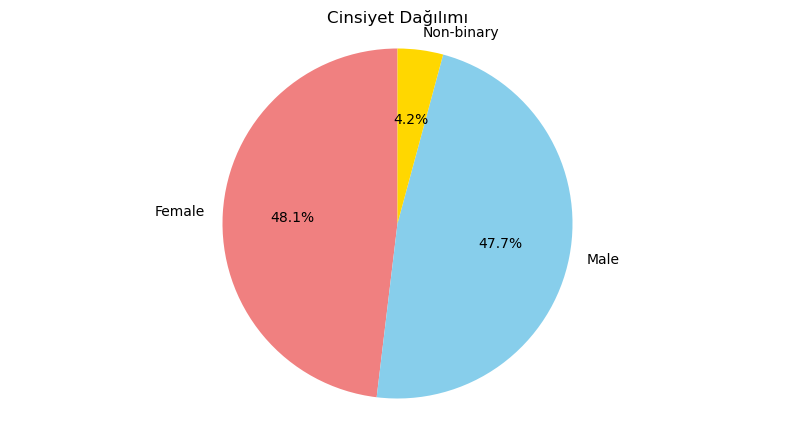

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

gender_counts = df["gender"].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue', 'gold'])

plt.title("Cinsiyet Dağılımı")
plt.axis('equal') 

plt.show()


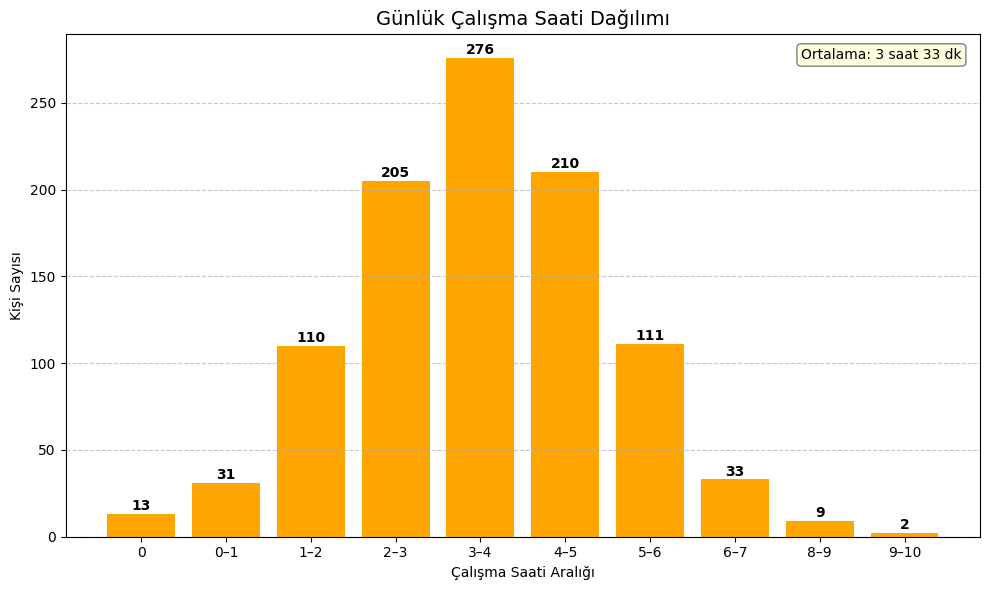

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

df['study_hour_group'] = pd.cut(
    df['study_hours_per_day'],
    bins=[-0.1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
    labels=['0', '0–1', '1–2', '2–3', '3–4', '4–5', '5–6', '6–7', '8–9', '9–10'],
    right=True
)

group_counts = df['study_hour_group'].value_counts().sort_index()
mean_study_hours = df['study_hours_per_day'].mean()

mean_hour = int(mean_study_hours)
mean_minute = int((mean_study_hours - mean_hour) * 60)

plt.figure(figsize=(10, 6))
bars = plt.bar(group_counts.index.astype(str), group_counts.values, color='orange')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(int(height)),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Günlük Çalışma Saati Dağılımı", fontsize=14)
plt.xlabel("Çalışma Saati Aralığı")
plt.ylabel("Kişi Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.text(
    0.98, 0.95,
    f"Ortalama: {mean_hour} saat {mean_minute} dk",
    transform=plt.gca().transAxes,
    fontsize=10,
    ha='right',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='lightyellow')
)

plt.tight_layout()
plt.show()


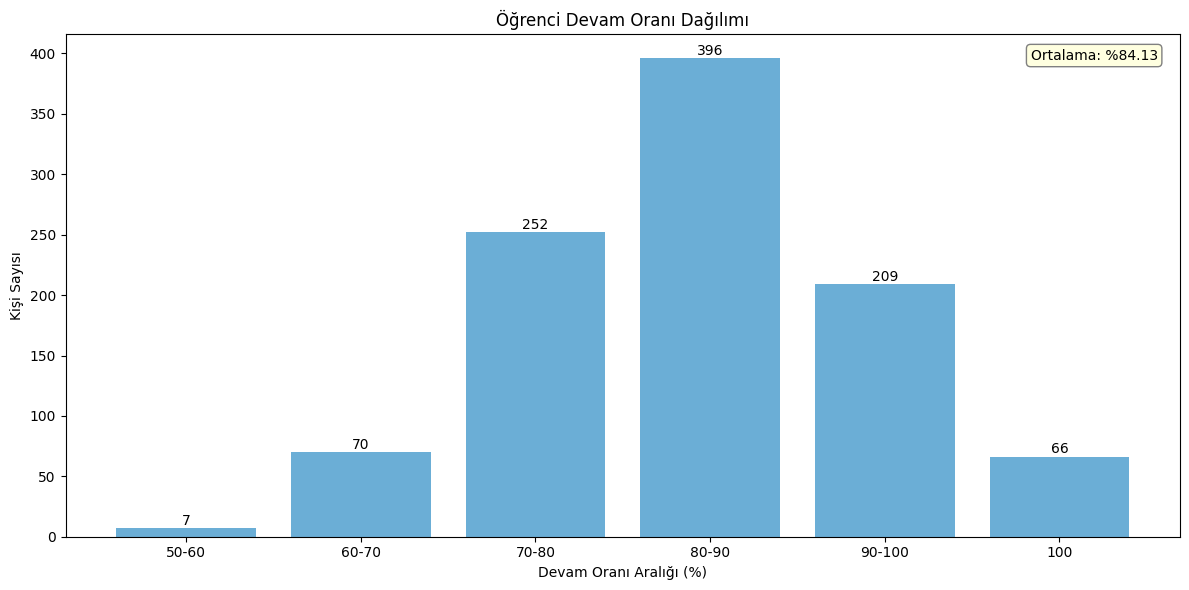

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

bins = [50, 60, 70, 80, 90, 99.9, 100]
labels = ['50-60', '60-70', '70-80', '80-90', '90-100', '100']

df['attendance_range'] = pd.cut(df['attendance_percentage'], bins=bins, labels=labels)
attendance_counts = df['attendance_range'].value_counts().sort_index()
mean_attendance = df['attendance_percentage'].mean()

plt.figure(figsize=(12, 6))
bars = plt.bar(attendance_counts.index, attendance_counts.values, color='#6baed6')
plt.title("Öğrenci Devam Oranı Dağılımı")
plt.xlabel("Devam Oranı Aralığı (%)")
plt.ylabel("Kişi Sayısı")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, int(yval), ha='center', va='bottom')

# Ortalama devam oranını yaz
plt.text(
    0.98, 0.95,
    f"Ortalama: %{mean_attendance:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    ha='right',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='lightyellow')
)

plt.tight_layout()
plt.show()


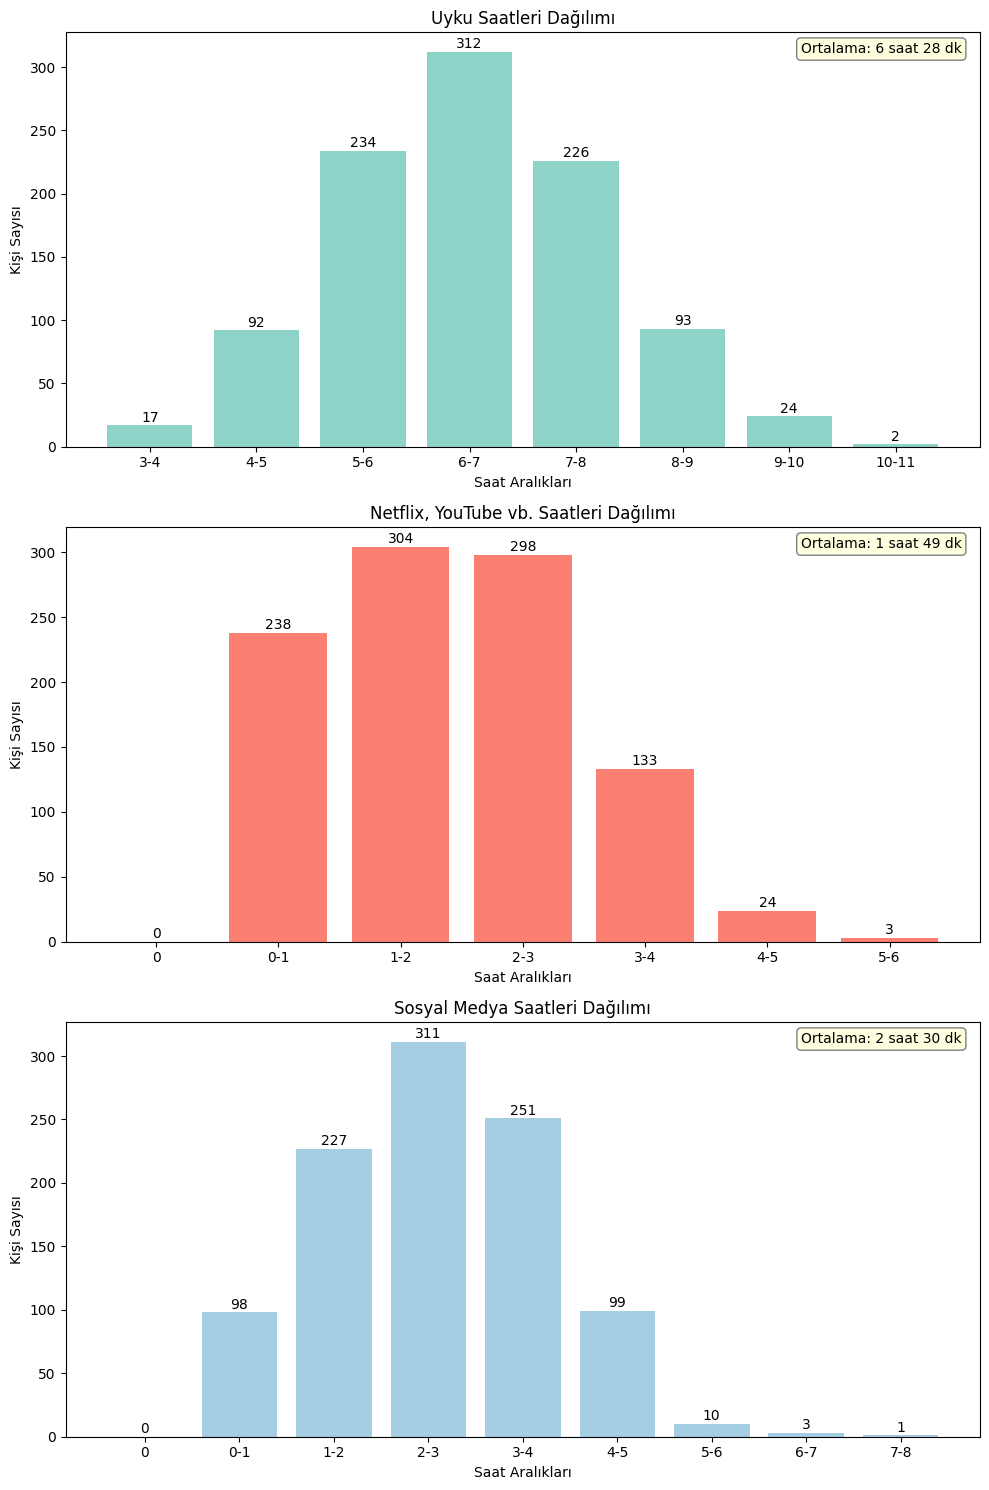

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

configs = [
    {
        "column": "sleep_hours",
        "bins": [3, 4, 5, 6, 7, 8, 9, 10, 11],
        "labels": ['3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11'],
        "title": "Uyku Saatleri Dağılımı",
        "colors": ['#8dd3c7']
    },
    {
        "column": "netflix_hours",
        "bins": [-0.1, 0, 1, 2, 3, 4, 5, 6],
        "labels": ['0', '0-1', '1-2', '2-3', '3-4', '4-5', '5-6'],
        "title": "Netflix, YouTube vb. Saatleri Dağılımı",
        "colors": ['#fb8072']
    },
    {
        "column": "social_media_hours",
        "bins": [-0.1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
        "labels": ['0', '0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8'],
        "title": "Sosyal Medya Saatleri Dağılımı",
        "colors": ['#a6cee3']
    }
]

plt.figure(figsize=(10, 15))

for i, config in enumerate(configs, 1):
    col = config["column"]
    bins = config["bins"]
    labels = config["labels"]
    title = config["title"]
    colors = config["colors"]
    
    df[col + '_range'] = pd.cut(df[col], bins=bins, labels=labels, right=False)
    count_data = df[col + '_range'].value_counts().sort_index()
    mean_value = df[col].mean()

    saat = int(mean_value)
    dakika = int((mean_value - saat) * 60)

    plt.subplot(3, 1, i)
    bars = plt.bar(count_data.index, count_data.values, color=colors)
    plt.title(title)
    plt.xlabel('Saat Aralıkları')
    plt.ylabel('Kişi Sayısı')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.5, int(yval), ha='center', va='bottom')

    # Ortalama değeri saat ve dakika olarak yaz
    plt.text(
        0.98, 0.95,
        f"Ortalama: {saat} saat {dakika} dk",
        transform=plt.gca().transAxes,
        fontsize=10,
        ha='right',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='lightyellow')
    )

plt.tight_layout()
plt.show()


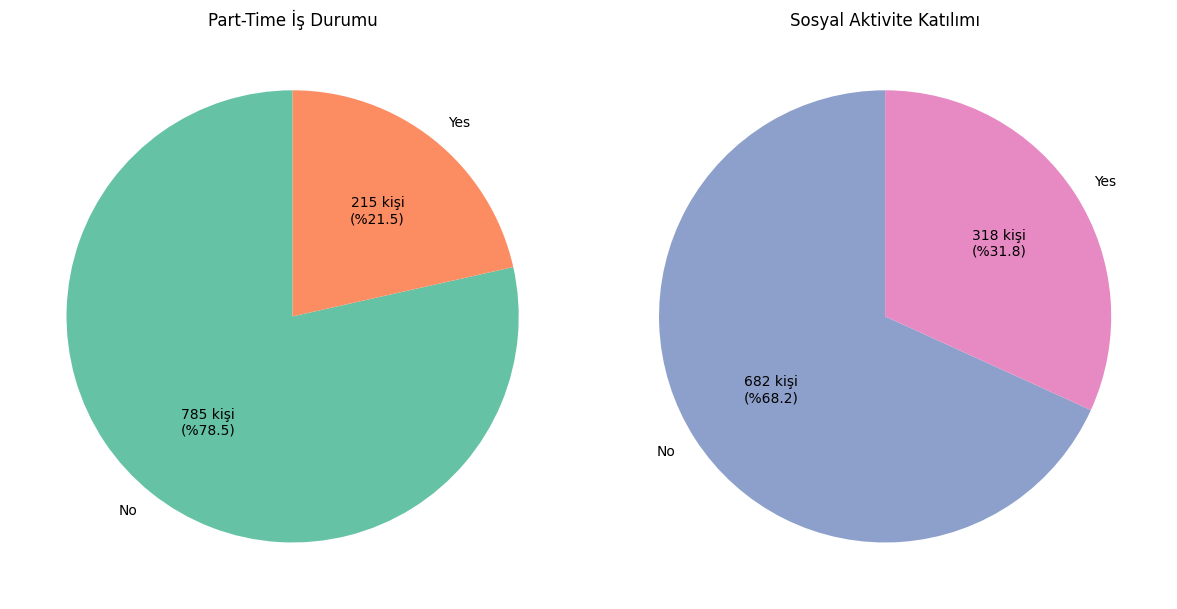

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

def format_label(pct, total):
    count = int(round(pct * total / 100.0))
    return f"{count} kişi\n(%{pct:.1f})"

# 1. Grafik: Part-time iş durumu
ptj_counts = df['part_time_job'].value_counts()
axes[0].pie(
    ptj_counts,
    labels=ptj_counts.index,
    autopct=lambda pct: format_label(pct, ptj_counts.sum()),
    colors=['#66c2a5', '#fc8d62'],
    startangle=90,
    textprops={'fontsize': 10}
)
axes[0].set_title("Part-Time İş Durumu")

# 2. Grafik: Sosyal aktivite katılımı
extra_counts = df['extracurricular_participation'].value_counts()
axes[1].pie(
    extra_counts,
    labels=extra_counts.index,
    autopct=lambda pct: format_label(pct, extra_counts.sum()),
    colors=['#8da0cb', '#e78ac3'],
    startangle=90,
    textprops={'fontsize': 10}
)
axes[1].set_title("Sosyal Aktivite Katılımı")

plt.tight_layout()
plt.show()


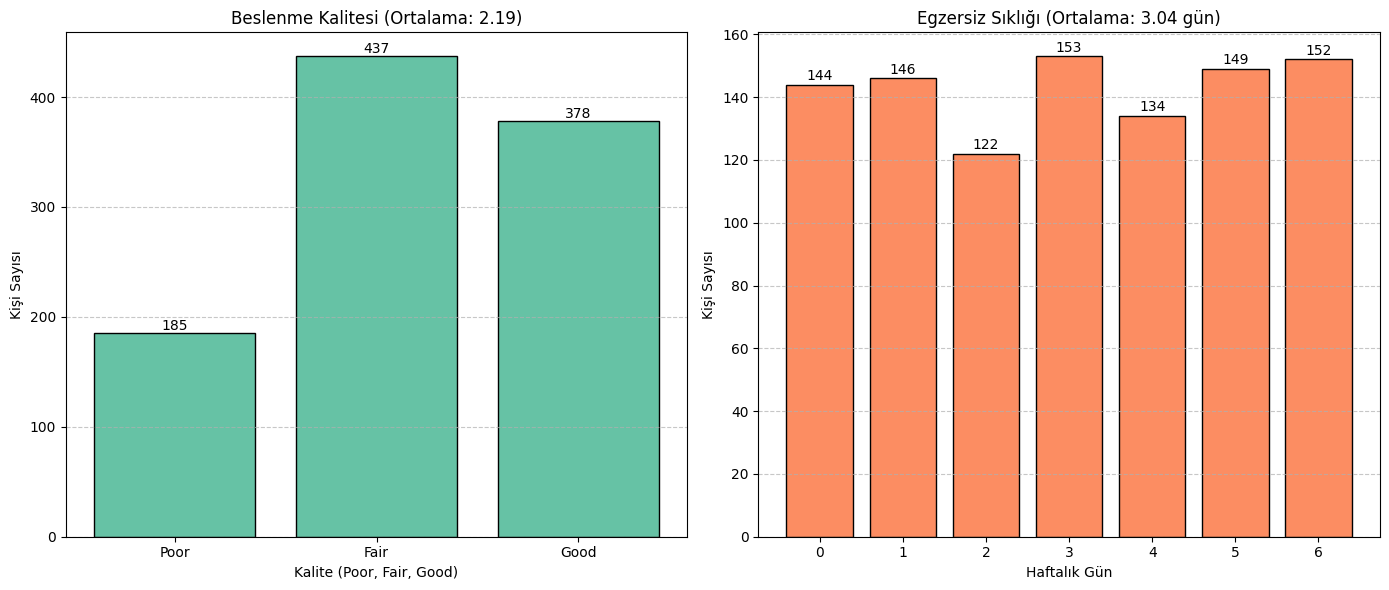

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ==== 1. Grafik: Beslenme Kalitesi ====
diet_counts = df['diet_quality'].value_counts().reindex(['Poor', 'Fair', 'Good'])
bars1 = axes[0].bar(diet_counts.index, diet_counts.values, color='#66c2a5', edgecolor='black')
# Ortalama hesapla
diet_map = {'Poor': 1, 'Fair': 2, 'Good': 3}
mean_diet = df['diet_quality'].map(diet_map).mean()
axes[0].set_title(f"Beslenme Kalitesi (Ortalama: {mean_diet:.2f})")
axes[0].set_ylabel("Kişi Sayısı")
axes[0].set_xlabel("Kalite (Poor, Fair, Good)")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Kişi sayısı etiketleri
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)),
                 ha='center', va='bottom', fontsize=10)

# ==== 2. Grafik: Egzersiz Sıklığı ====
exercise_counts = df['exercise_frequency'].value_counts().sort_index()
bars2 = axes[1].bar(exercise_counts.index.astype(str), exercise_counts.values, color='#fc8d62', edgecolor='black')
mean_exercise = df['exercise_frequency'].mean()
axes[1].set_title(f"Egzersiz Sıklığı (Ortalama: {mean_exercise:.2f} gün)")
axes[1].set_ylabel("Kişi Sayısı")
axes[1].set_xlabel("Haftalık Gün")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)),
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


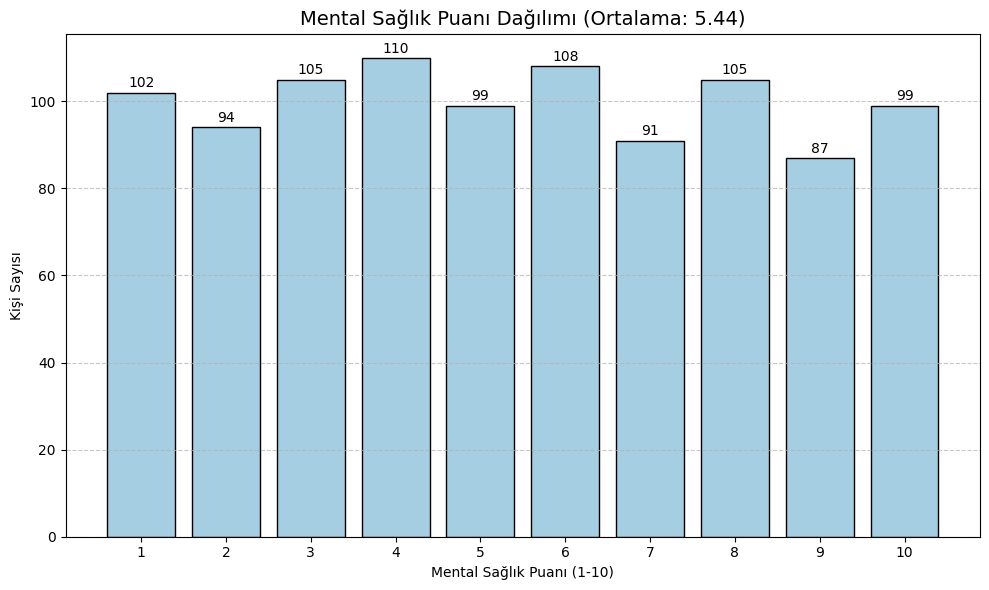

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

mental_counts = df['mental_health_rating'].value_counts().sort_index()
mean_mental = df['mental_health_rating'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(mental_counts.index.astype(str), mental_counts.values, color='#a6cee3', edgecolor='black')

# Kişi sayısını yaz
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(int(height)),
             ha='center', va='bottom', fontsize=10)

# Başlık ve etiketler
plt.title(f"Mental Sağlık Puanı Dağılımı (Ortalama: {mean_mental:.2f})", fontsize=14)
plt.xlabel("Mental Sağlık Puanı (1-10)")
plt.ylabel("Kişi Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


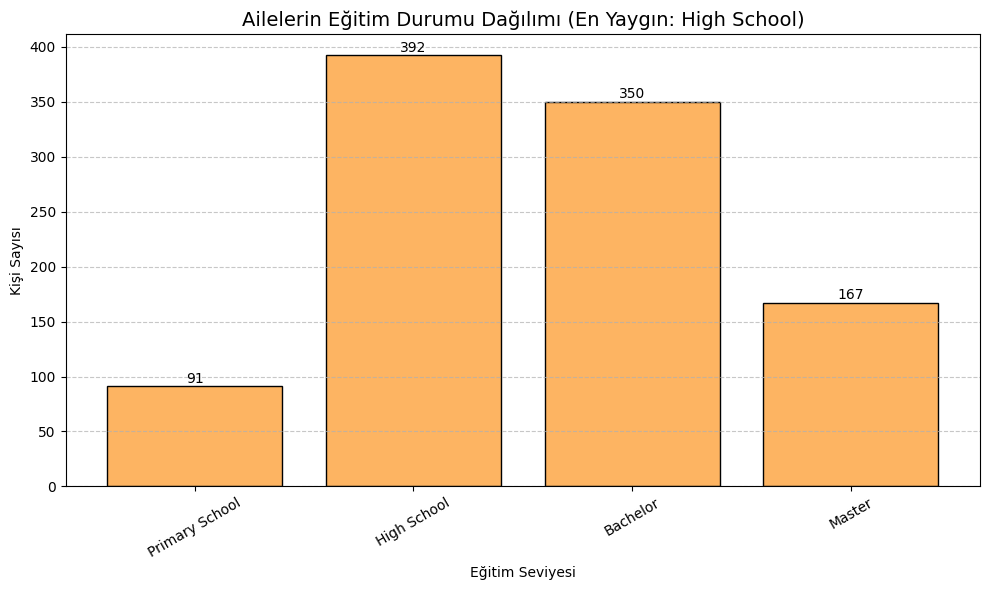

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

edu_order = ['Primary School', 'High School', 'Bachelor', 'Master', 'PhD']
edu_counts = df['parental_education_level'].value_counts()
edu_counts = edu_counts.reindex(edu_order).dropna()

# En sık görülen eğitim düzeyini buluyoruz
mode_edu = df['parental_education_level'].mode()[0]

plt.figure(figsize=(10, 6))
bars = plt.bar(edu_counts.index, edu_counts.values, color='#fdb462', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(int(height)),
             ha='center', va='bottom', fontsize=10)

plt.title(f"Ailelerin Eğitim Durumu Dağılımı (En Yaygın: {mode_edu})", fontsize=14)
plt.xlabel("Eğitim Seviyesi")
plt.ylabel("Kişi Sayısı")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


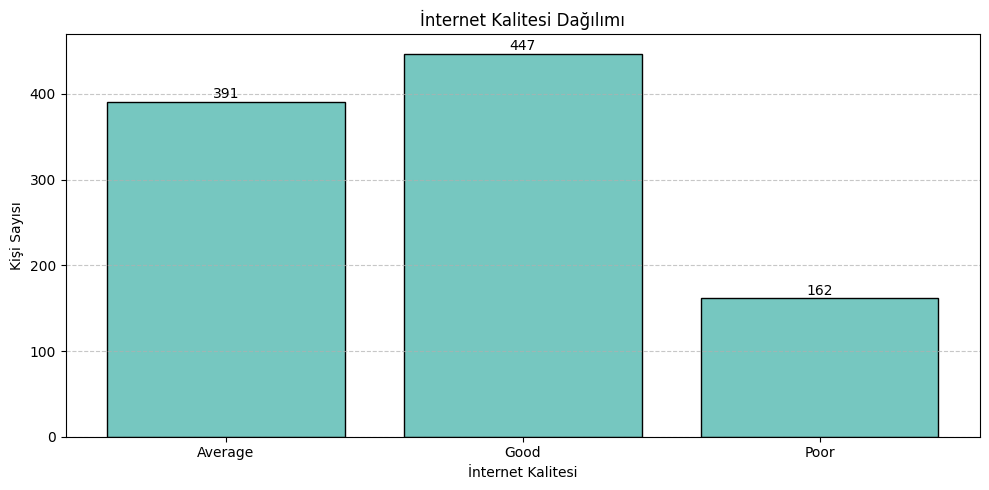

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

internet_counts = df['internet_quality'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
bars = plt.bar(internet_counts.index, internet_counts.values, color='#76c7c0', edgecolor='black')

plt.title("İnternet Kalitesi Dağılımı")
plt.xlabel("İnternet Kalitesi")
plt.ylabel("Kişi Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


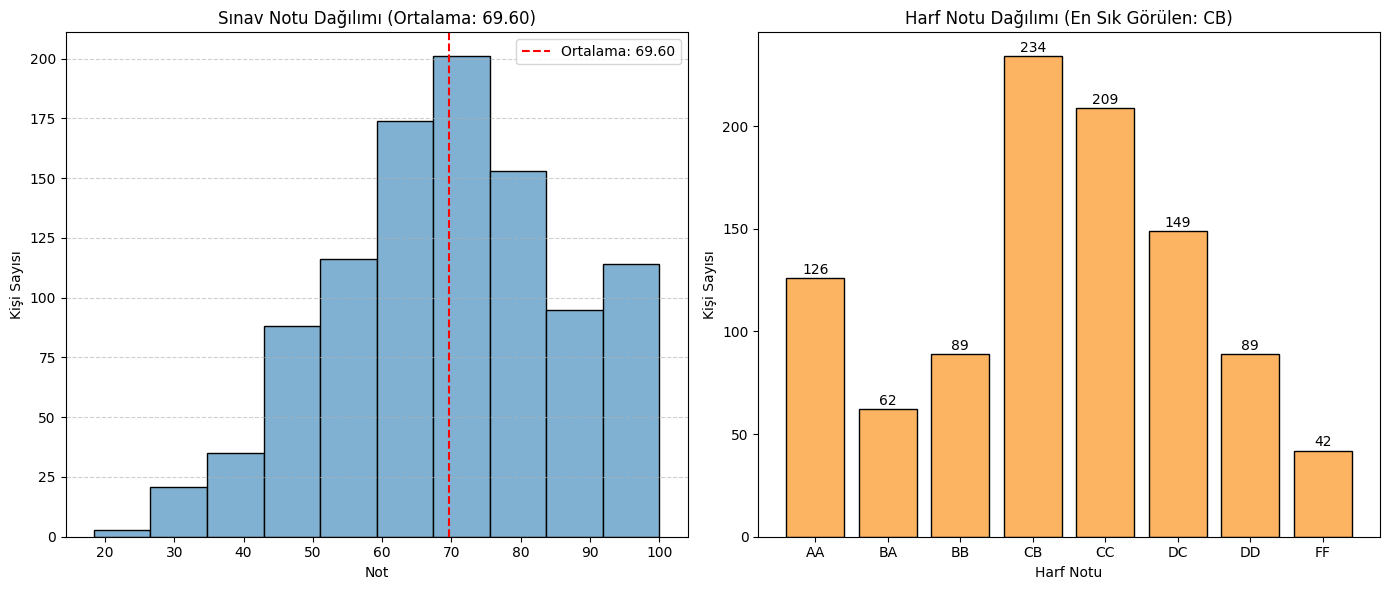

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

mean_score = df['exam_score'].mean()
mode_grade = df['grade'].mode()[0]

grade_counts = df['grade'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Grafik: Notların histogramı
axes[0].hist(df['exam_score'], bins=10, color='#80b1d3', edgecolor='black')
axes[0].axvline(mean_score, color='red', linestyle='--', label=f"Ortalama: {mean_score:.2f}")
axes[0].set_title("Sınav Notu Dağılımı")
axes[0].set_xlabel("Not")
axes[0].set_ylabel("Kişi Sayısı")
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# 2. Grafik: Harf notlarının dağılımı
bars = axes[1].bar(grade_counts.index, grade_counts.values, color='#fdb462', edgecolor='black')
axes[1].set_title(f"Harf Notu Dağılımı (En Sık: {mode_grade})")
axes[1].set_xlabel("Harf Notu")
axes[1].set_ylabel("Kişi Sayısı")

for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval),
                 ha='center', va='bottom', fontsize=10)

axes[0].set_title(f"Sınav Notu Dağılımı (Ortalama: {mean_score:.2f})")
axes[1].set_title(f"Harf Notu Dağılımı (En Sık Görülen: {mode_grade})")

plt.tight_layout()
plt.show()
